In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import folium
import seaborn as sns
%matplotlib inline

In [2]:
run 'clean_data.py'

In [3]:
df = df.drop(df.columns[[1,2]], axis=1)

In [4]:
df.head()

,year,latitude,longitude,depth,temperature,oxygen
39,1984,80.7333,12.8533,3.0,-0.8198,400.4
41,1984,80.7333,12.8533,37.0,-0.8118,347.7
42,1984,80.7333,12.8533,77.0,1.5336,315.0
43,1984,80.7333,12.8533,116.0,2.3164,317.6
44,1984,80.7333,12.8533,156.0,2.8303,314.1


In [16]:
surface = df[df['depth']<=20]

In [17]:
surface.head()

,year,latitude,longitude,depth,temperature,oxygen
39,1984,80.7333,12.8533,3.0,-0.8198,400.4
58,1984,80.9050,18.5883,5.0,2.3114,386.9
59,1984,80.9050,18.5883,18.0,1.2787,382.5
66,1984,81.0517,17.6683,6.0,1.7416,372.3
82,1984,81.1967,16.7933,4.0,-0.7188,398.3


# EDA

Text(0.5,1,'Correlation Heat Map')

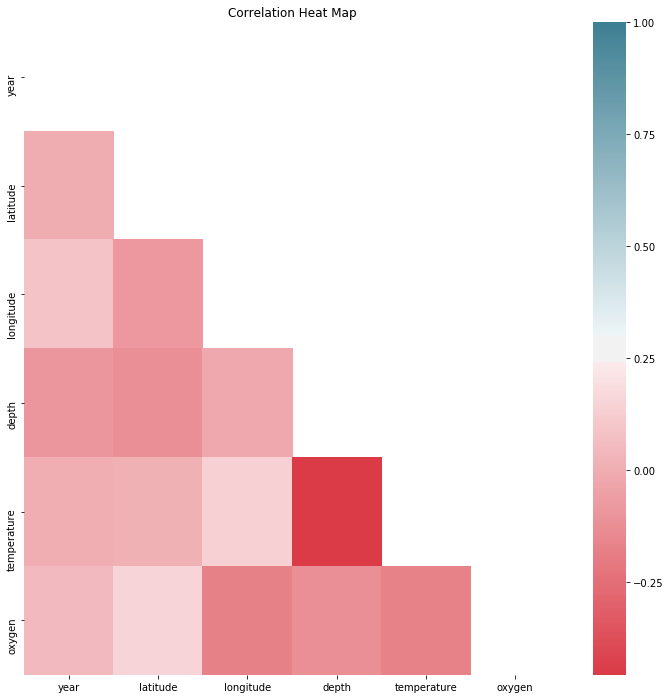

In [5]:
f, ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap)
ax.set_title("Correlation Heat Map")

Text(0.5,1,'Correlation Heat Map')

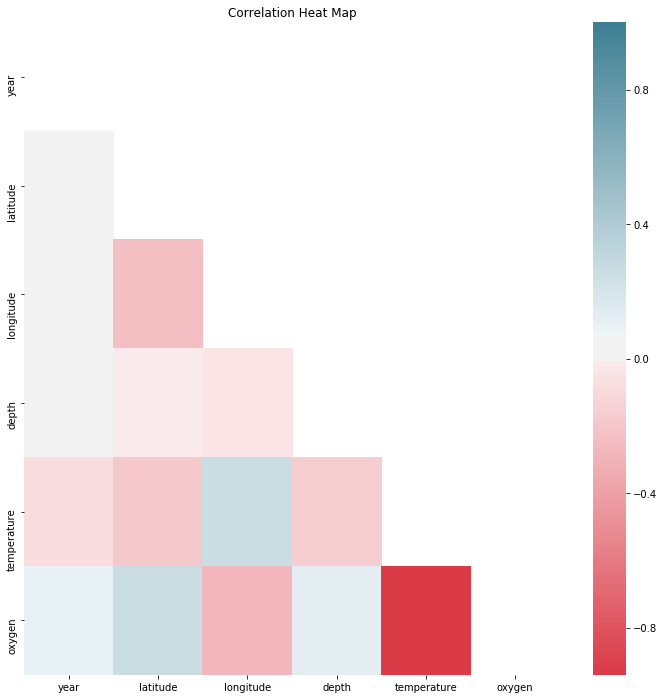

In [19]:
f, ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(surface.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(surface.corr(), mask=mask, cmap=cmap)
ax.set_title("Correlation Heat Map")

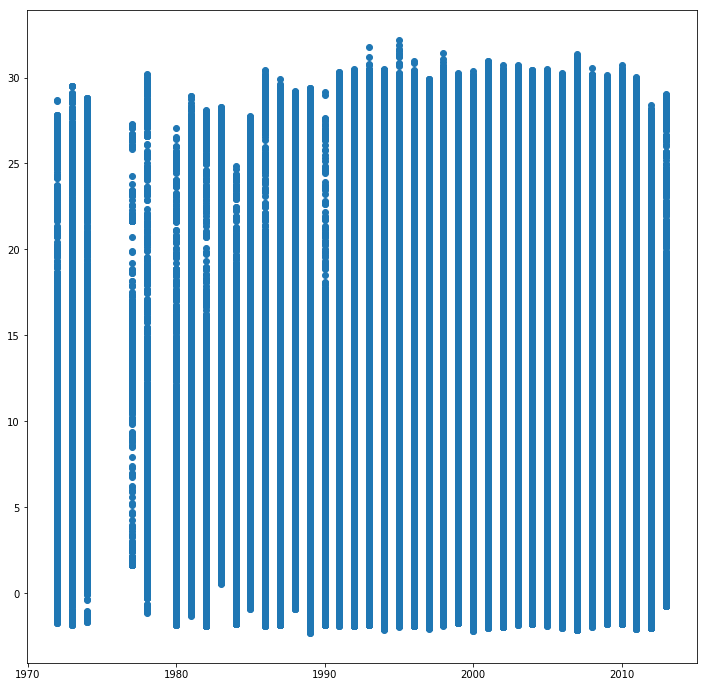

In [6]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(df['year'], df['temperature'])

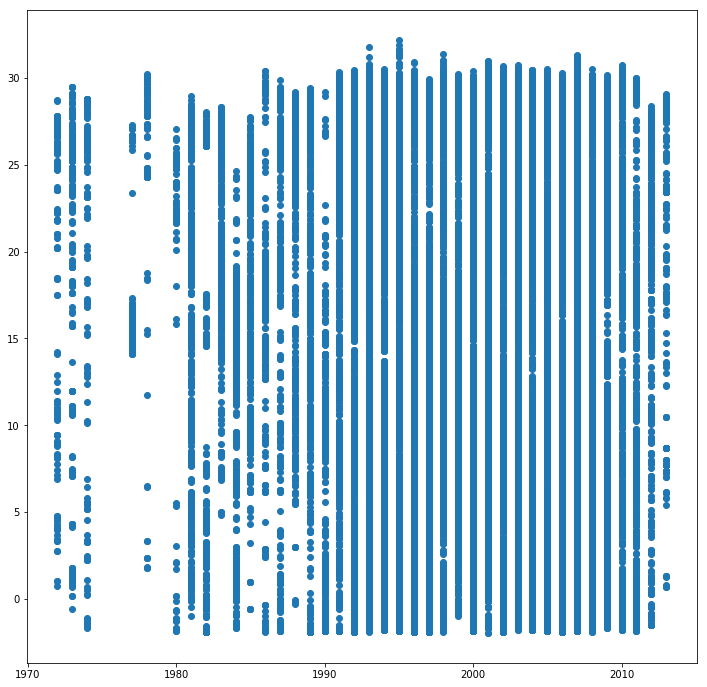

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(surface['year'], surface['temperature'])

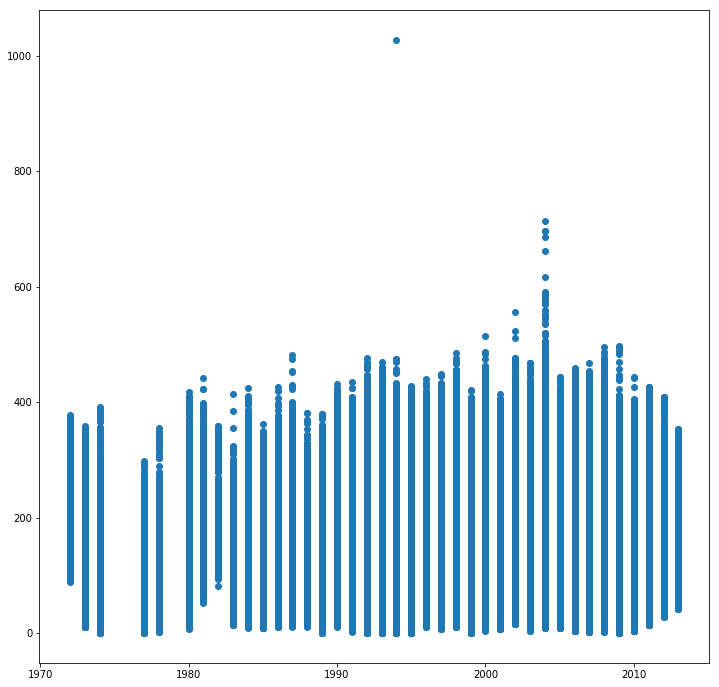

In [10]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(df['year'], df['oxygen'])

### What is that outlier?

In [11]:
df[df['oxygen']>800]

,year,latitude,longitude,depth,temperature,oxygen
164928,1994,50.0058,-144.971,3345.0,1.5171,1026.9


### Let's keep it!

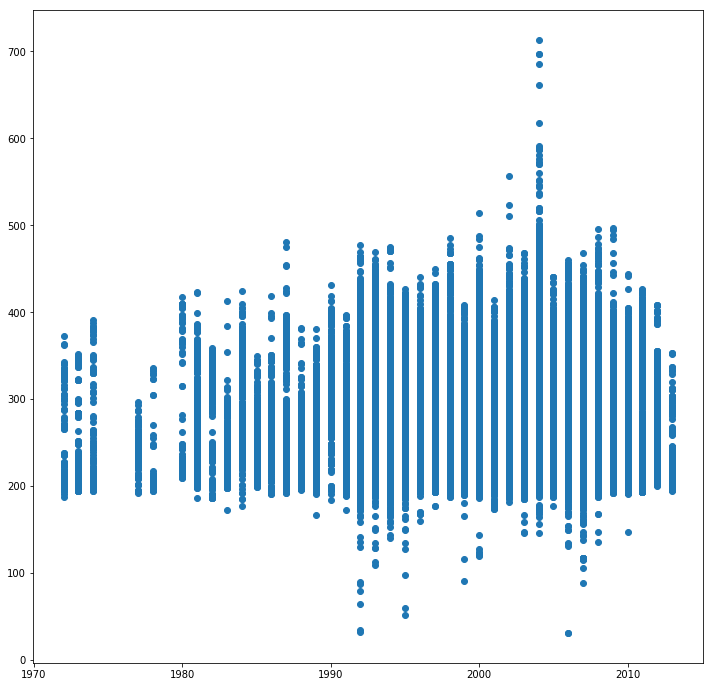

In [21]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(surface['year'], surface['oxygen'])

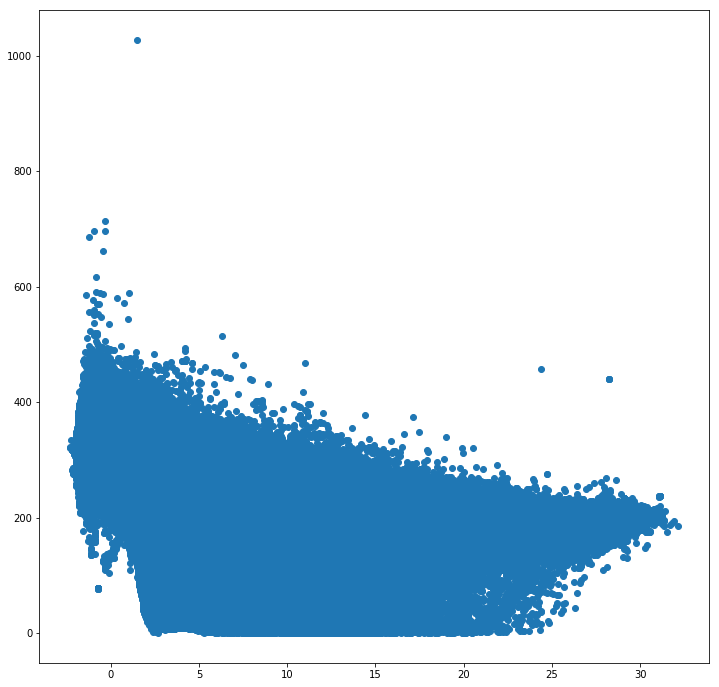

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(df['temperature'], df['oxygen'])

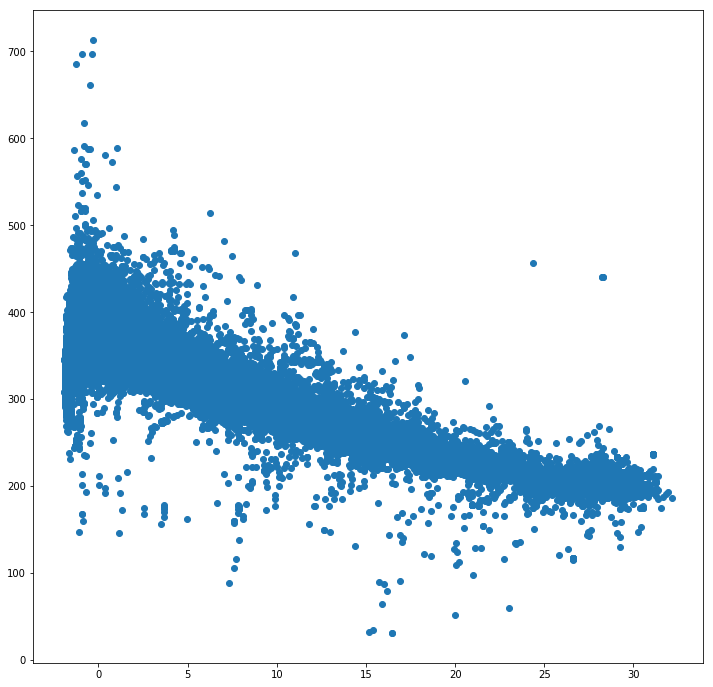

In [22]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(surface['temperature'], surface['oxygen'])

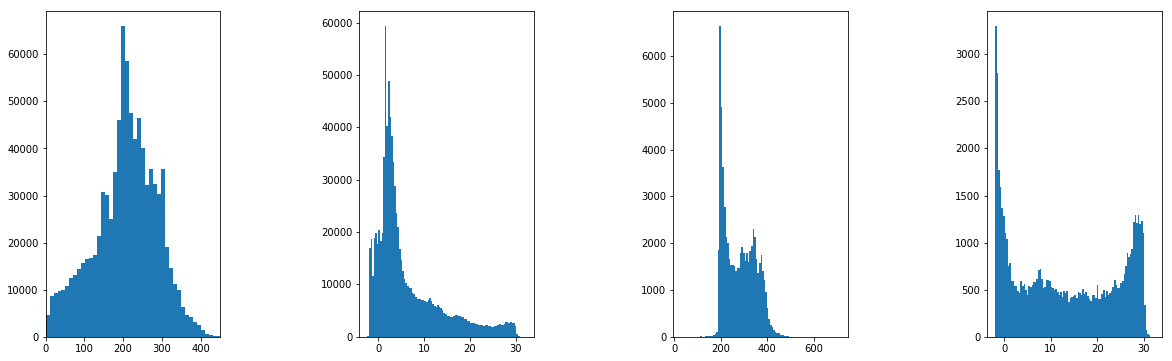

In [28]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(141)
ax.set_xlim(0, 450)
ax.hist(df['oxygen'], bins=100)

ax2 = fig.add_subplot(142)
ax2.hist(df['temperature'], bins=100)

ax3 = fig.add_subplot(143)
ax3.hist(surface['oxygen'], bins=100)

ax4 = fig.add_subplot(144)
ax4.hist(surface['temperature'], bins=100)
fig.subplots_adjust(wspace=0.8)

# Question:
Are ocean temperature and dissolved oxygen correlated?

## Hypothesis testing framework:
- H0: There is no difference
- H1: There is a difference 
- Significance level: alpha=0.05
- Chosen test: t-test, because

### Scatter Matrix

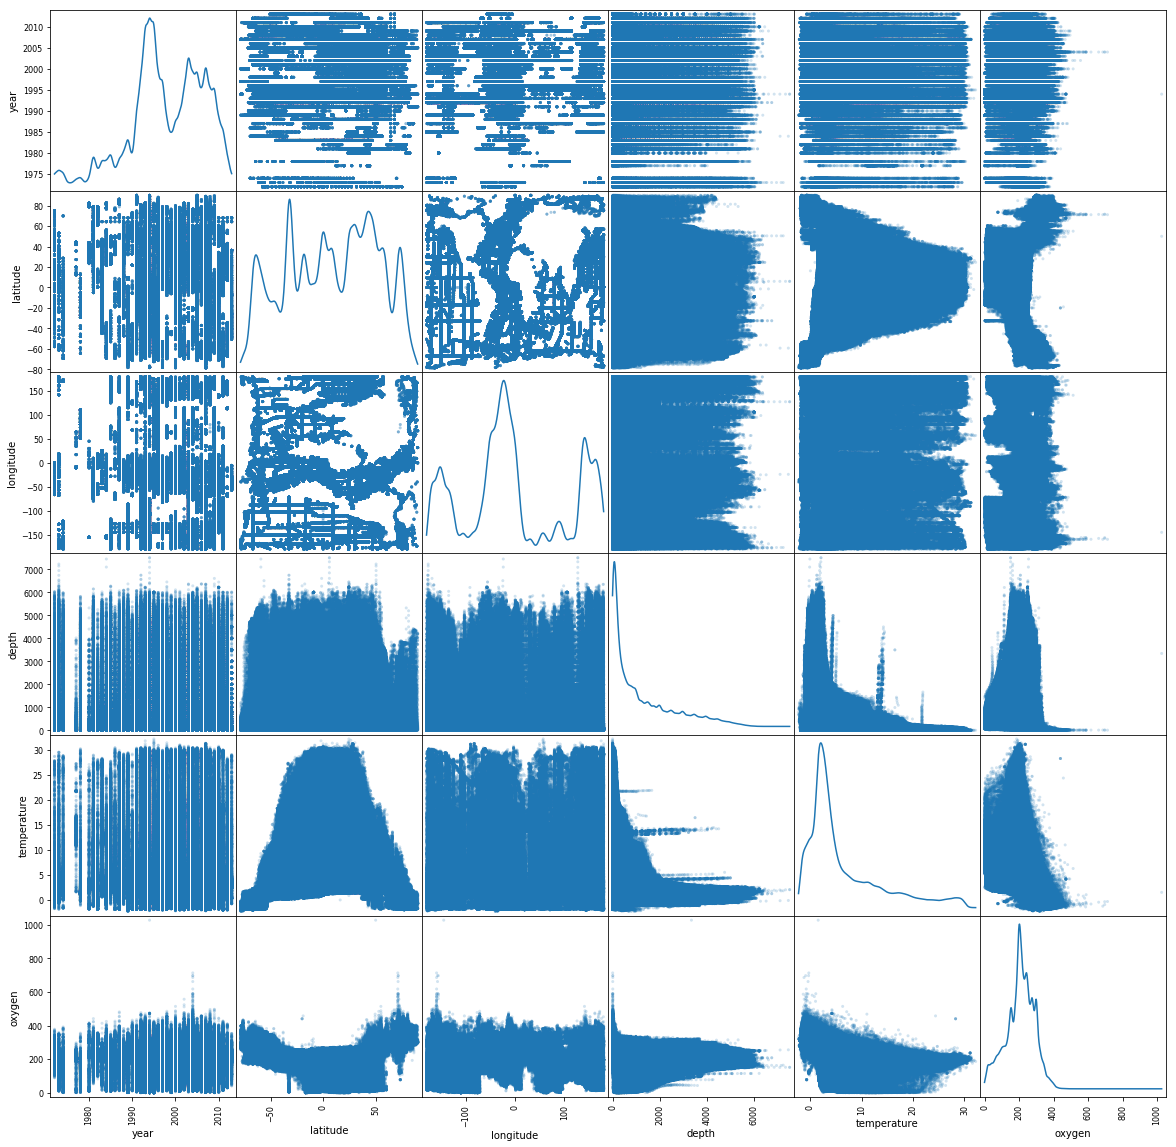

In [14]:
_ = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [ ]:
_ = pd.plotting.scatter_matrix(scatter, alpha=0.2, figsize=(20, 20), diagonal='kde')